## Extend of POC

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [2]:
path= 'C:/Users/USER/Desktop/dataset/deepL/na_processing/'
train = pd.read_csv(path+'train_preprocessed.csv')
test = pd.read_csv(path+'test_preprocessed.csv')

In [3]:
split_point = train.shape[0]
data = pd.concat([train.drop('voted',axis=1),test],ignore_index=True) # train에서 voted 제외한 전체 data

In [4]:
EnV = train[['education','voted']]
EnV

,education,voted
0,2,2
1,4,2
2,3,1
3,4,1
4,3,1
...,...,...
45524,2,2
45525,2,2
45526,2,1
45527,4,1


In [5]:
EnV.education.value_counts()

2    17007
3    15423
4     7967
1     5132
Name: education, dtype: int64

In [6]:
EnV.voted[EnV.voted == 2] = 0  

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [7]:
ratio = EnV.groupby(['education'],as_index=False).mean()
# 무응답(0)을 제외하고 교육수준이 높아질수록 투표율 증가함
ratio

,education,voted
0,1,0.051637
1,2,0.367143
2,3,0.595539
3,4,0.619807


[Text(0, 0, 'Less than high School'),
 Text(0, 0, 'High School'),
 Text(0, 0, 'University Degree'),
 Text(0, 0, 'Graduate Degree')]

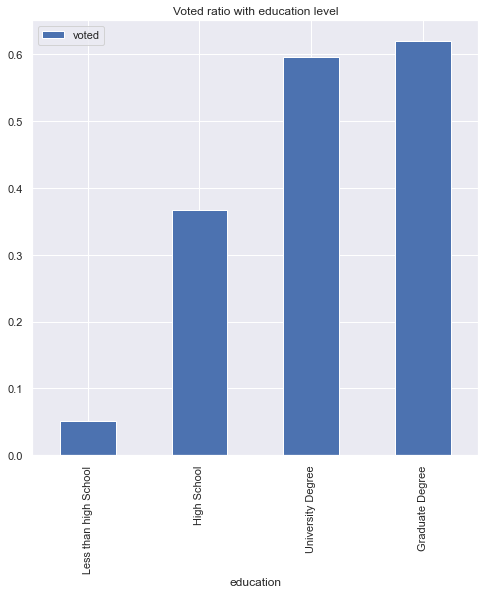

In [8]:
ax = ratio.plot(x='education',y='voted',
                kind='bar',              
                figsize=(8,8),                                    
                title='Voted ratio with education level')

ax.set_xticklabels(['Less than high School','High School','University Degree','Graduate Degree'])

In [9]:
"""
학력과 투표율의 상관관계에서

고졸 미만과 고졸의 차이가 31.6%
고졸과 대학 졸업의 차이가 22.8%
대학과 대학원의 차이가 2.4% 로

학력이 증가할 수록 투표율은 높아지는 경향
학력이 증가할 때 학력 간 투표율의 차이는 좁혀진다.

"""

'\n학력과 투표율의 상관관계에서\n\n고졸 미만과 고졸의 차이가 31.6%\n고졸과 대학 졸업의 차이가 22.8%\n대학과 대학원의 차이가 2.4% 로\n\n학력이 증가할 수록 투표율은 높아지는 경향\n학력이 증가할 때 학력 간 투표율의 차이는 좁혀진다.\n\n'

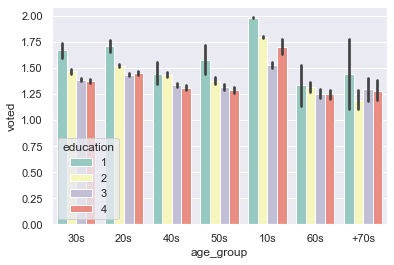

In [11]:
sns.barplot(x = 'age_group', y = 'voted',
            data=train,
            hue='education',
            palette='Set3',         
           )

"""
10대 투표율 저조
"""

##  Question P/N 채우기

In [12]:
question_cols = ['QaA', 'QbA', 'QcA', 'QdA', 'QeA',
             'QfA', 'QgA', 'QhA', 'QiA', 'QjA', 
             'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 
             'QpA', 'QqA', 'QrA', 'QsA', 'QtA']

In [13]:
question_data = data[question_cols].copy()

In [14]:
corr = question_data.corr(method='spearman')

In [15]:
low = corr.min().min()
high = corr.max().max()

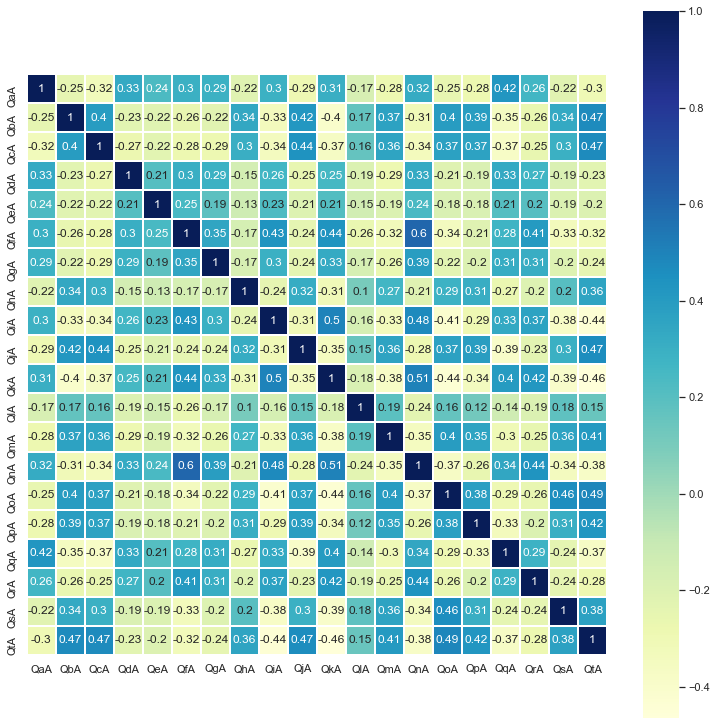

In [16]:
plt.figure(figsize=(13,13))
sns.heatmap(corr,square=True,
            vmin=low,
            vmax=high,
            cmap='YlGnBu',
           annot=True,
           linewidths=1)

In [17]:
already_know_negative = ["QeA", "QfA", "QkA", "QqA", "QrA"]
question_data[already_know_negative]=6-question_data[already_know_negative]
# 답변이 1~5 이므로 6-negative로 scaling 

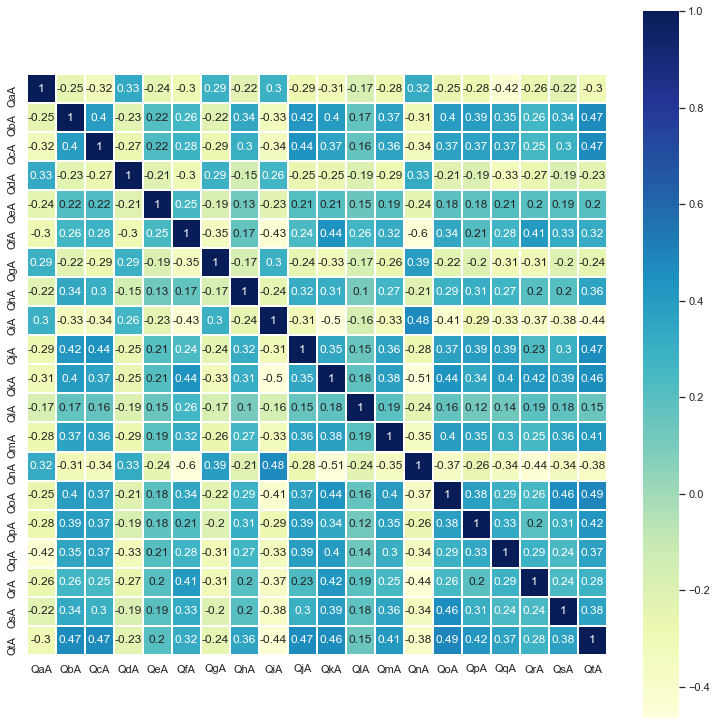

In [18]:
corr = question_data.corr(method='spearman')
plt.figure(figsize=(13,13))
sns.heatmap(corr,square=True,
            vmin=low,
            vmax=high,
            cmap='YlGnBu',
           annot=True,
           linewidths=1)

In [19]:
# heatmap으로부터 a,d,g,i,n이 negative인것을 암
from_heatmap_negative = ["QaA", "QdA", "QgA", "QiA", "QnA"]
question_data[from_heatmap_negative]=6-question_data[from_heatmap_negative]

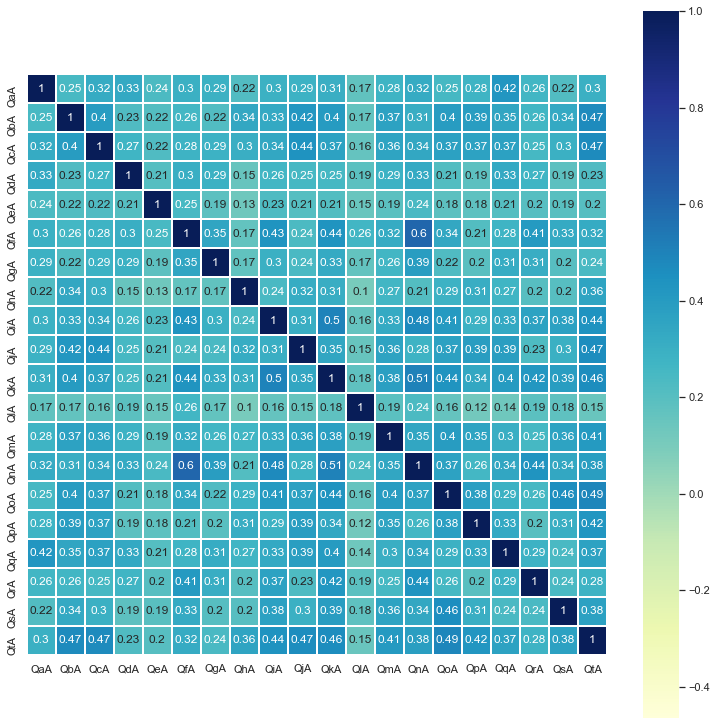

In [20]:
corr = question_data.corr(method='spearman')
plt.figure(figsize=(13,13))
sns.heatmap(corr,square=True,
            vmin=low,
            vmax=high,
            cmap='YlGnBu',
           annot=True,
           linewidths=1)

In [21]:
# 최종 negative Qustion
total_negative_cols = ["QeA", "QfA", "QkA", "QqA", "QrA", "QaA", "QdA", "QgA", "QiA", "QnA"]

In [27]:
data['mach_score'] = question_data.mean(axis=1)
data['mach_score']

0        2.95
1        2.60
2        1.90
3        3.35
4        3.00
         ... 
56907    3.20
56908    4.55
56909    3.15
56910    3.05
56911    3.40
Name: mach_score, Length: 56912, dtype: float64

In [28]:
data[total_negative_cols] = 6-data[total_negative_cols] # negative 점수들 data에서 뒤집기

In [29]:
data.corr(method='spearman')['mach_score'].abs().sort_values(ascending=False)

mach_score    1.000000
QkA           0.703600
QtA           0.687191
QnA           0.671035
QiA           0.652672
                ...   
wr_10         0.012502
QhE           0.011556
wr_12         0.003012
tp05          0.000641
wr_02         0.000264
Name: mach_score, Length: 73, dtype: float64

In [30]:
# 데이터에서 question column 제외하고 corr
data.drop(question_cols,axis=1).corr(method='spearman')['mach_score'].abs().sort_values(ascending=False)

mach_score    1.000000
tp07          0.447810
tp02          0.333765
QcE           0.245177
QdE           0.238957
QsE           0.221888
married       0.208360
QaE           0.203744
QfE           0.200529
QlE           0.194205
QtE           0.188428
QeE           0.185026
QoE           0.181326
QmE           0.179667
QjE           0.173067
QbE           0.160420
QgE           0.157986
QrE           0.152576
QnE           0.132547
familysize    0.111787
education     0.110599
QkE           0.107585
QpE           0.102847
tp08          0.100640
tp01          0.099807
wf_02         0.099744
QqE           0.098700
wr_01         0.097602
wf_01         0.087511
tp03          0.074888
engnat        0.073201
wf_03         0.066154
wr_06         0.060324
wr_04         0.053877
tp06          0.051129
tp04          0.048917
hand          0.046420
wr_09         0.042376
QiE           0.041483
urban         0.032113
wr_07         0.031294
tp10          0.027864
wr_05         0.026575
wr_11      

In [31]:
# train에대한 mach_score
train['mach_score']=data.iloc[:split_point]['mach_score']

In [32]:
train.groupby(['voted'])['mach_score'].mean() # 큰 차이 없 투표여부와 와 mach_score

voted
1    3.263302
2    3.426417
Name: mach_score, dtype: float64

In [38]:
train['mach_int'] = np.round(train['mach_score']) # train set의 mach score 반올림

In [39]:
train[['mach_int','voted']].corr('spearman')

,mach_int,voted
mach_int,1.000000,0.097279
voted,0.097279,1.000000


In [47]:
train.mach_score

0        2.95
1        2.60
2        1.90
3        3.35
4        3.00
         ... 
45524    4.15
45525    3.80
45526    1.50
45527    2.90
45528    3.40
Name: mach_score, Length: 45529, dtype: float64

In [52]:
train.groupby(['education','married'])['voted'].mean().unstack()

married,1,2,3
education,,,
1,1.965045,1.611940,1.603774
2,1.691746,1.385302,1.496840
3,1.441839,1.323881,1.393680
4,1.459417,1.295779,1.348614


In [59]:
False_Ans = data[['wf_01','wf_02','wf_03']].copy()
False_Ans

,wf_01,wf_02,wf_03
0,0,0,0
1,0,0,0
2,0,0,1
3,0,0,0
4,0,1,0
...,...,...,...
56907,0,0,0
56908,0,1,1
56909,0,1,1
56910,0,0,0


##  있지 않는 단어를 맞다고 한 사람들의 학력의 관계성?

In [64]:
# wf_T >> 틀린 갯수 총합 0~3 
wf_T = False_Ans.wf_01 + False_Ans.wf_02 + False_Ans.wf_03
wf_T

0        0
1        0
2        1
3        0
4        1
        ..
56907    0
56908    2
56909    2
56910    0
56911    0
Length: 56912, dtype: int64

In [67]:
wf_T.value_counts()
# 옳은답 41976 / 틀린답 14936

0    41976
1    10551
2     3084
3     1301
dtype: int64

In [75]:
train.education.value_counts()

2    17007
3    15423
4     7967
1     5132
Name: education, dtype: int64

In [82]:
# education & wrong
EnW = pd.concat([data.education,wf_T],axis=1)
EnW.columns = ['education','total_wrong_ans']
EnW

,education,total_wrong_ans
0,2,0
1,4,0
2,3,1
3,4,0
4,3,1
...,...,...
56907,3,0
56908,2,2
56909,4,2
56910,2,0


In [256]:
ax = EnW.groupby(['education']).total_wrong_ans.value_counts().unstack()
ax_sum = ax.apply(sum,axis=1) 
ax[0]/ax_sum
#ax/ax_sum

education
1    0.741336
2    0.735119
3    0.731614
4    0.751859
dtype: float64

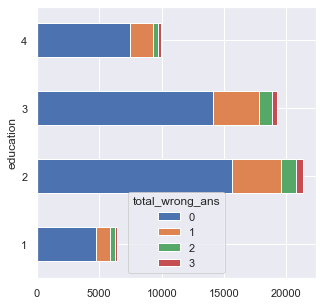

In [123]:
ax.plot(kind='barh',stacked=True,
       figsize=(5,5))

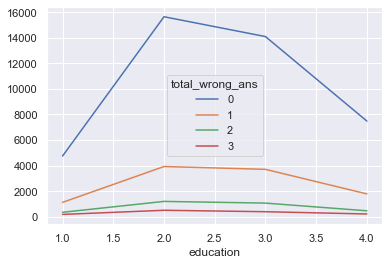

In [124]:
ax.plot()

### 3개의 없는 단어에 대해 3개 모두 없다고한  wf_total = 0의 비율은 학력 2 > 3 > 4 > 1 순이다.
+ 저학력일수록 0의 비율이 커질 줄 알았지만 아니었음.
+ 고졸 > 대졸 > 대학원졸 > 고졸 미만 순

### wf_total = 0 인 데이터의 Wr 과의 관계를 보기로 함 

In [158]:
# Wf의 total 이 0인 index
wft_zero_index = EnW[EnW.total_wrong_ans == 0].index

In [166]:
wft_zero = data.iloc[wft_zero_index]
wft_zero

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,mach_score
0,3.0,363,4.0,1370,5.0,997,5.0,1024,4.0,1577,...,1,0,1,1,0,1,0,1,1,2.95
1,1.0,647,5.0,1313,3.0,3387,1.0,2969,5.0,4320,...,1,0,1,1,0,1,0,1,1,2.60
3,3.0,504,3.0,2311,4.0,992,3.0,3245,5.0,357,...,0,0,0,1,0,1,0,1,1,3.35
5,4.0,834,1.0,1769,4.0,2105,5.0,1070,1.0,1930,...,0,0,0,1,0,0,0,0,0,2.20
8,1.0,795,2.0,3469,4.0,1693,3.0,1991,2.0,5922,...,0,0,0,1,0,0,0,1,1,3.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56903,4.0,338,2.0,686,4.0,790,4.0,667,4.0,693,...,1,0,1,1,0,1,0,1,1,3.45
56906,4.0,2916,1.0,1302,2.0,4142,4.0,4390,5.0,3233,...,1,1,1,1,0,1,0,1,1,3.80
56907,1.0,427,5.0,1066,5.0,588,5.0,560,4.0,1110,...,1,0,1,1,0,1,0,1,1,3.20
56910,4.0,539,1.0,2090,2.0,4642,5.0,673,4.0,1185,...,0,0,1,1,0,1,1,1,0,3.05


In [142]:
# 있는 단어에 대한 Yes/NO column
wr_column = ['wr_01','wr_02','wr_03','wr_04','wr_05','wr_06','wr_07','wr_08','wr_09','wr_10','wr_11','wr_12','wr_13']

In [169]:
wr_data = data[wr_column].iloc[wft_zero_index].copy()
wr_data

,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,1,0,0,1,0,1,1,0,1,0,1,1
1,0,1,0,1,1,0,1,1,0,1,0,1,1
3,0,1,0,0,0,0,0,1,0,1,0,1,1
5,0,1,0,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56903,0,1,0,1,1,0,1,1,0,1,0,1,1
56906,1,1,0,1,1,1,1,1,0,1,0,1,1
56907,1,1,0,1,1,0,1,1,0,1,0,1,1
56910,1,1,0,1,0,0,1,1,0,1,1,1,0


In [170]:
# wf_total = 0 인 index에 해당하는 wr_data의 행을 합함 (0~13)
wr_T = wr_data.apply(sum,axis=1)
wr_T

0         7
1         8
3         5
5         2
8         3
         ..
56903     8
56906    10
56907     9
56910     8
56911     3
Length: 41976, dtype: int64

In [165]:
wr_T.value_counts().sort_index()

0       363
1       381
2       416
3       470
4       661
5       902
6      1677
7      3074
8      6136
9     10636
10     7795
11     4627
12     2705
13     2133
dtype: int64

In [175]:
wr_wf = pd.concat([wr_T,wft_zero.education],axis=1)
wr_wf.columns = ['wr_total','education']
wr_wf

,wr_total,education
0,7,2
1,8,4
3,5,4
5,2,2
8,3,4
...,...,...
56903,8,2
56906,10,3
56907,9,3
56910,8,2


In [270]:
# wf = 0 인 index에 대한 wr 
ax2 = wr_wf.groupby(['education']).wr_total.value_counts().unstack()
ax2

wr_total,0,1,2,3,4,5,6,7,8,9,10,11,12,13
education,,,,,,,,,,,,,,
1,43,74,54,75,119,168,355,566,998,1289,667,205,89,47
2,120,138,151,143,220,342,652,1312,2691,4641,2911,1408,580,338
3,137,112,144,164,206,239,415,783,1767,3422,2939,1854,1110,804
4,63,57,67,88,116,153,255,413,680,1284,1278,1160,926,944


In [211]:
# wf = 0 인 index에 대한 wr (normalize)
ax2 = wr_wf.groupby(['education']).wr_total.value_counts(normalize=True).unstack()
ax2

wr_total,0,1,2,3,4,5,6,7,8,9,10,11,12,13
education,,,,,,,,,,,,,,
1,0.009055,0.015582,0.011371,0.015793,0.025058,0.035376,0.074753,0.119183,0.210150,0.271426,0.140451,0.043167,0.018741,0.009897
2,0.007669,0.008820,0.009650,0.009139,0.014060,0.021857,0.041669,0.083850,0.171982,0.296606,0.186042,0.089985,0.037068,0.021602
3,0.009719,0.007946,0.010216,0.011635,0.014614,0.016955,0.029441,0.055548,0.125355,0.242764,0.208499,0.131527,0.078746,0.057037
4,0.008418,0.007616,0.008952,0.011758,0.015500,0.020444,0.034073,0.055184,0.090861,0.171566,0.170764,0.154997,0.123731,0.126136


In [266]:
ax2 = wr_wf.groupby(['education']).wr_total.value_counts().unstack()
ax3 = ax2.div(ax2.sum(axis=1),axis=0) # education 별 비율
ax3

wr_total,0,1,2,3,4,5,6,7,8,9,10,11,12,13
education,,,,,,,,,,,,,,
1,0.009055,0.015582,0.011371,0.015793,0.025058,0.035376,0.074753,0.119183,0.210150,0.271426,0.140451,0.043167,0.018741,0.009897
2,0.007669,0.008820,0.009650,0.009139,0.014060,0.021857,0.041669,0.083850,0.171982,0.296606,0.186042,0.089985,0.037068,0.021602
3,0.009719,0.007946,0.010216,0.011635,0.014614,0.016955,0.029441,0.055548,0.125355,0.242764,0.208499,0.131527,0.078746,0.057037
4,0.008418,0.007616,0.008952,0.011758,0.015500,0.020444,0.034073,0.055184,0.090861,0.171566,0.170764,0.154997,0.123731,0.126136


+ Education class(1-4) 별 wr_total(0-13) 분포

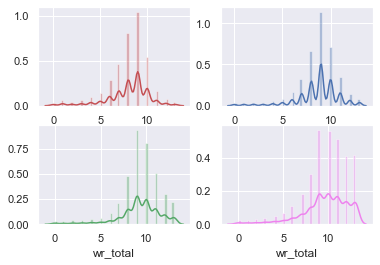

In [264]:
plt.subplot(221) # education class 1
sns.distplot(wr_wf['wr_total'][wr_wf['education']==1], color='r')
plt.subplot(222) # education class 2
sns.distplot(wr_wf['wr_total'][wr_wf['education']==2], color='b')
plt.subplot(223) # education class 3
sns.distplot(wr_wf['wr_total'][wr_wf['education']==3], color='g')
plt.subplot(224) # education class 4
sns.distplot(wr_wf['wr_total'][wr_wf['education']==4],color='violet')


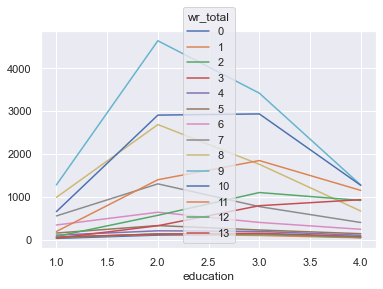

In [190]:
ax2.plot()